In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#### Data Inspection and Cleaning

In [2]:
df = pd.read_csv('housing.csv')
df_housing = df.copy()

In [3]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df_housing.info()

#total_bedrooms column had 207 nulls values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Data Cleaning: fillNa with mean values

df_housing['total_bedrooms'] = df_housing['total_bedrooms'].fillna(df_housing["total_bedrooms"].median())

In [6]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### Data Visualization and Correlation

In [7]:
fig = px.histogram(df_housing,
             x = 'median_income',
             marginal ='box',
             title =('Median Income Ratio'))
fig.update_layout(width = 1000, height = 600, bargap= 0.1)
fig.show()

In [8]:
fig = px.histogram(df_housing,
             x = 'median_house_value',
             marginal ='box',
             color_discrete_sequence= ['green'],
             title =('House Value Ratio'))
fig.update_layout(width = 1000, height = 600, bargap= 0.1)
fig.show()

In [9]:
fig = px.histogram(df_housing, 
                   x ='median_house_value', 
                   marginal='box', 
                   color='ocean_proximity', 
                   color_discrete_sequence=['orange', 'blue','green','red','grey'], 
                   title='House Value by Location')
fig.update_layout(width = 1000, height = 600, bargap=0.1)
fig.show()

<Axes: title={'center': 'Longitude vs Latitude Values'}, xlabel='latitude', ylabel='longitude'>

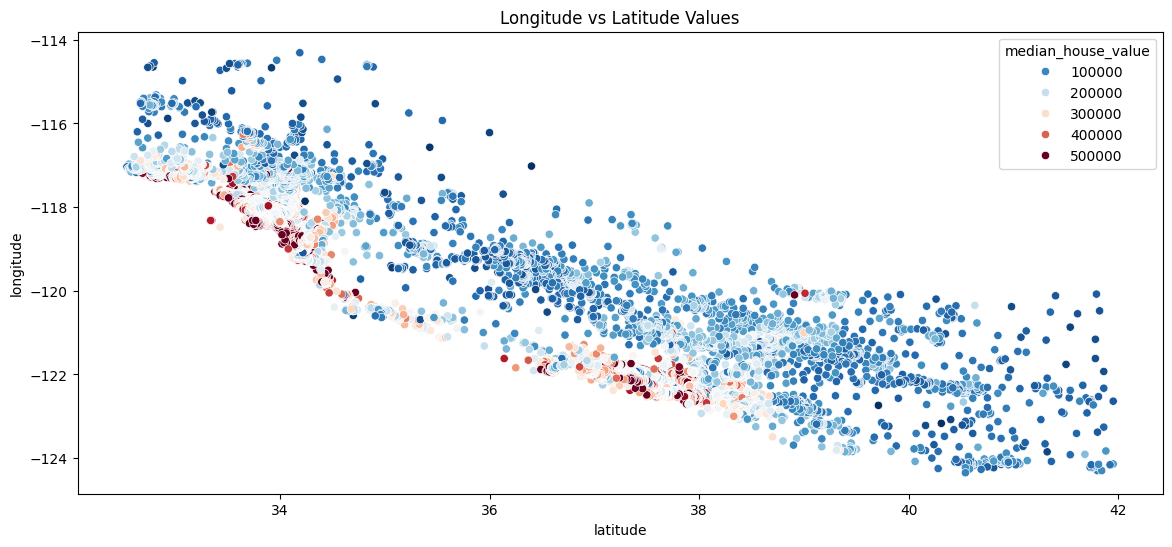

In [10]:
plt.figure(figsize=(14,6))
plt.title('Longitude vs Latitude Values')
sns.scatterplot( x ='latitude', y ='longitude', hue= 'median_house_value', data = df_housing, palette='RdBu_r')

<Axes: >

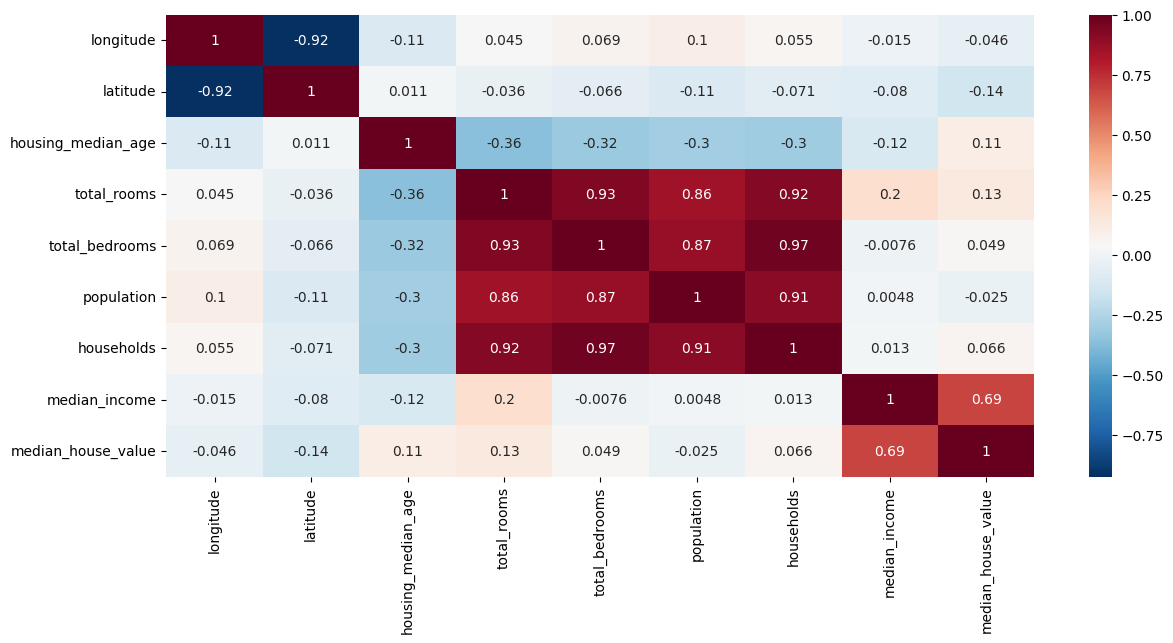

In [11]:
plt.figure(figsize=(14,6))
sns.heatmap(df_housing.loc[:, df_housing.columns != 'ocean_proximity'].corr(), annot = True, cmap="RdBu_r")

#### Data Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder

# Setting parameter: converting str values to float

l = LabelEncoder()
df_housing['ocean_proximity'] = l.fit_transform(df_housing['ocean_proximity'])

In [13]:
# select the important columns to train, remove(longitude and latitude columns)

df_train = df_housing[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity',]]

#### Data Training and Prediction

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# split data into x and y

x = df_train.drop(["median_house_value"],axis=1).values
y= df_train['median_house_value'].values

In [16]:
# split data into train and 25% test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [17]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#### Linear Regression Model

In [18]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [48]:
# function for linear regression values

def linearvalues(reg, x_train, y_train, x_test, y_test, df_train):
    train_linear_score = reg.score(x_train, y_train)
    test_linear_score = reg.score(x_test, y_test)
    intercept = reg.intercept_
    coef_df = pd.DataFrame(reg.coef_, df_train.columns[:-1], columns=['coefficients'])
    print('Linear Regression Calculations')
    print("\nR-squared (train):", train_linear_score)
    print("R-squared (test):", test_linear_score)
    print("Intercept:", intercept)
    print("\nCoefficients:")
    print(coef_df)


linearvalues(reg, x_train, y_train, x_test, y_test, df_train)


Linear Regression Calculations

R-squared (train): 0.5672750919561842
R-squared (test): 0.5715211321381475
Intercept: 188180.6950382696

Coefficients:
                     coefficients
housing_median_age   34284.159929
total_rooms         -31897.798129
total_bedrooms       26047.661173
population          -30799.740479
households           46045.346166
median_income       104161.864401
median_house_value    4618.068414


In [20]:
pred_1 = reg.predict(x_test)

In [21]:
linear_plot = pd.DataFrame({'y_test': y_test, 'prediction': pred_1})

linear_plot.head()

,y_test,prediction
0,92800.0,154224.107689
1,59100.0,150491.286162
2,92400.0,111009.052899
3,152800.0,113957.630724
4,137500.0,120370.703087


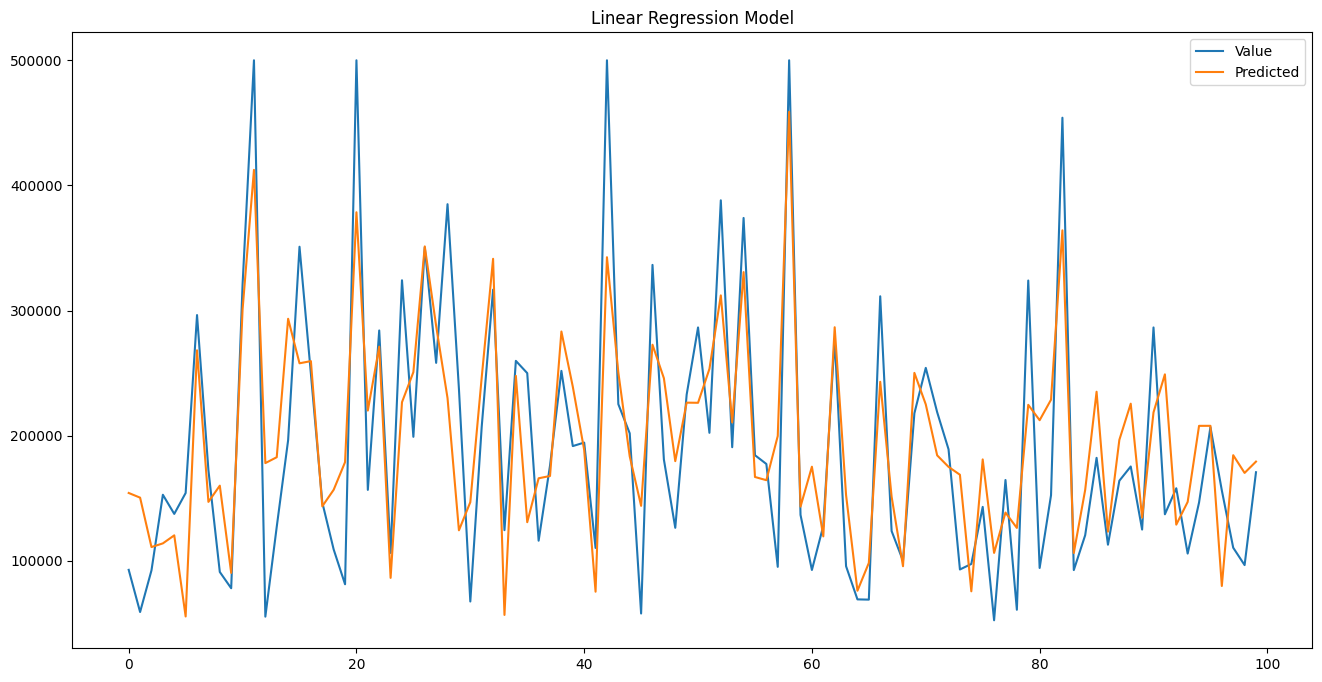

In [22]:
plt.figure(figsize=(16,8))
plt.plot(linear_plot[:100])
plt.title('Linear Regression Model')
plt.legend(["Value","Predicted"])

#### Ridge Model

In [23]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha = 0.9)
ridge.fit(x_train, y_train)

Ridge(alpha=0.9)

In [24]:
# function for ridge values

def ridgevalues(ridge, x_train, y_train, x_test, y_test, df_train):
    train_linear_score = ridge.score(x_train, y_train)
    test_linear_score = ridge.score(x_test, y_test)
    intercept = ridge.intercept_
    coef_df = pd.DataFrame(ridge.coef_, df_train.columns[:-1], columns=['coefficients'])
    print('Ridge Model Calculations')
    print("\nR-squared (train):", train_linear_score)
    print("R-squared (test):", test_linear_score)
    print("Intercept:", intercept)
    print("\nCoefficients:")
    print(coef_df)


ridgevalues(ridge, x_train, y_train, x_test, y_test, df_train)


Ridge Model Calculations

R-squared (train): 0.5672750699906788
R-squared (test): 0.5715186145862701
Intercept: 188183.2524305023

Coefficients:
                     coefficients
housing_median_age   34280.461295
total_rooms         -31867.295494
total_bedrooms       26038.751966
population          -30788.758015
households           46011.043618
median_income       104144.898435
median_house_value    4618.349761


In [25]:
pred_2 = ridge.predict(x_test)

In [26]:
ridge_plot = pd.DataFrame({'y_test': y_test, 'prediction': pred_2})

ridge_plot.head()

,y_test,prediction
0,92800.0,154234.562545
1,59100.0,150500.408129
2,92400.0,111028.705161
3,152800.0,113967.262652
4,137500.0,120384.735460


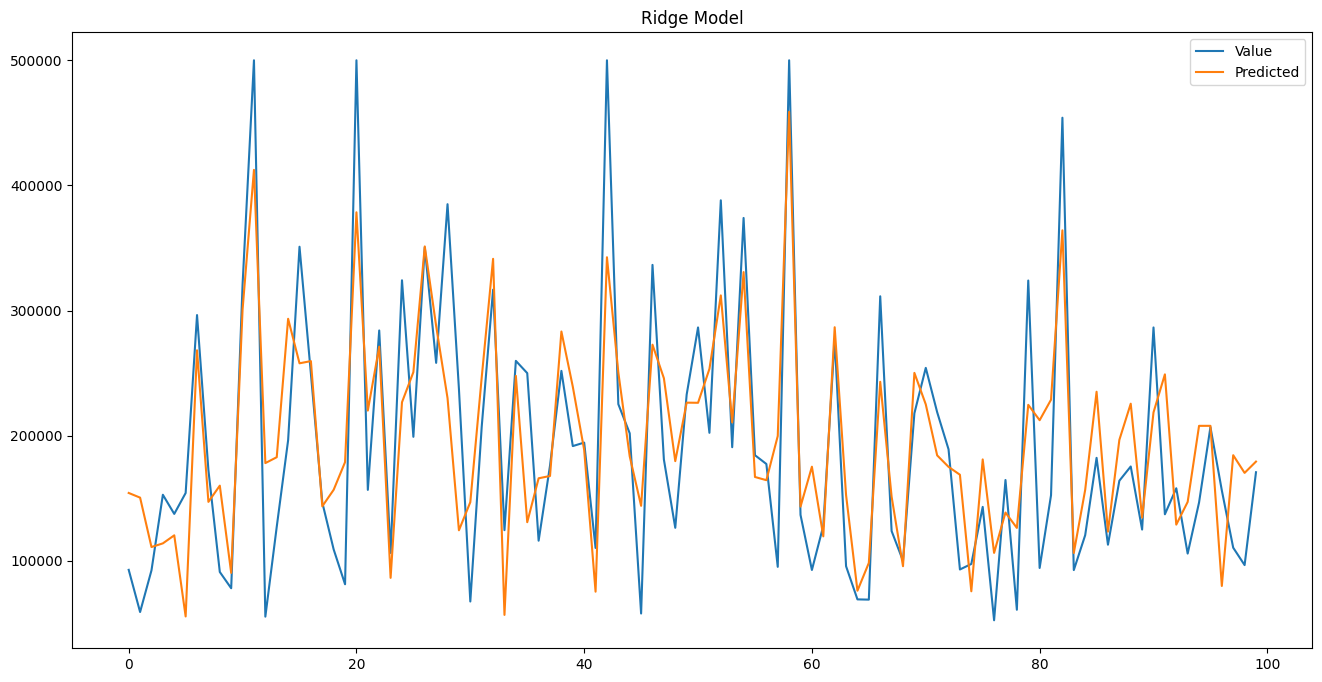

In [27]:
plt.figure(figsize=(16,8))
plt.plot(ridge_plot[:100])
plt.title('Ridge Model')
plt.legend(["Value","Predicted"])

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [29]:
# function for forest values

def forestvalues(forest, x_train, y_train, x_test, y_test, df_train):
    train_linear_score = forest.score(x_train, y_train)
    test_linear_score = forest.score(x_test, y_test)
    intercept = forest.intercept_
    coef_df = pd.DataFrame(forest.coef_, df_train.columns[:-1], columns=['coefficients'])
    print('Random Forest Regressor Calculations')
    print("\nR-squared (train):", train_linear_score)
    print("R-squared (test):", test_linear_score)
    print("Intercept:", intercept)
    print("\nCoefficients:")
    print(coef_df)


forestvalues(reg, x_train, y_train, x_test, y_test, df_train)


Random Forest Regressor Calculations

R-squared (train): 0.5672750919561842
R-squared (test): 0.5715211321381475
Intercept: 188180.6950382696

Coefficients:
                     coefficients
housing_median_age   34284.159929
total_rooms         -31897.798129
total_bedrooms       26047.661173
population          -30799.740479
households           46045.346166
median_income       104161.864401
median_house_value    4618.068414


In [30]:
pred_3 = forest.predict(x_test)

In [31]:
forest_plot = pd.DataFrame({'y_test': y_test, 'prediction': pred_3})

forest_plot.head()

,y_test,prediction
0,92800.0,97998.0
1,59100.0,91521.0
2,92400.0,119681.0
3,152800.0,132866.0
4,137500.0,107185.0


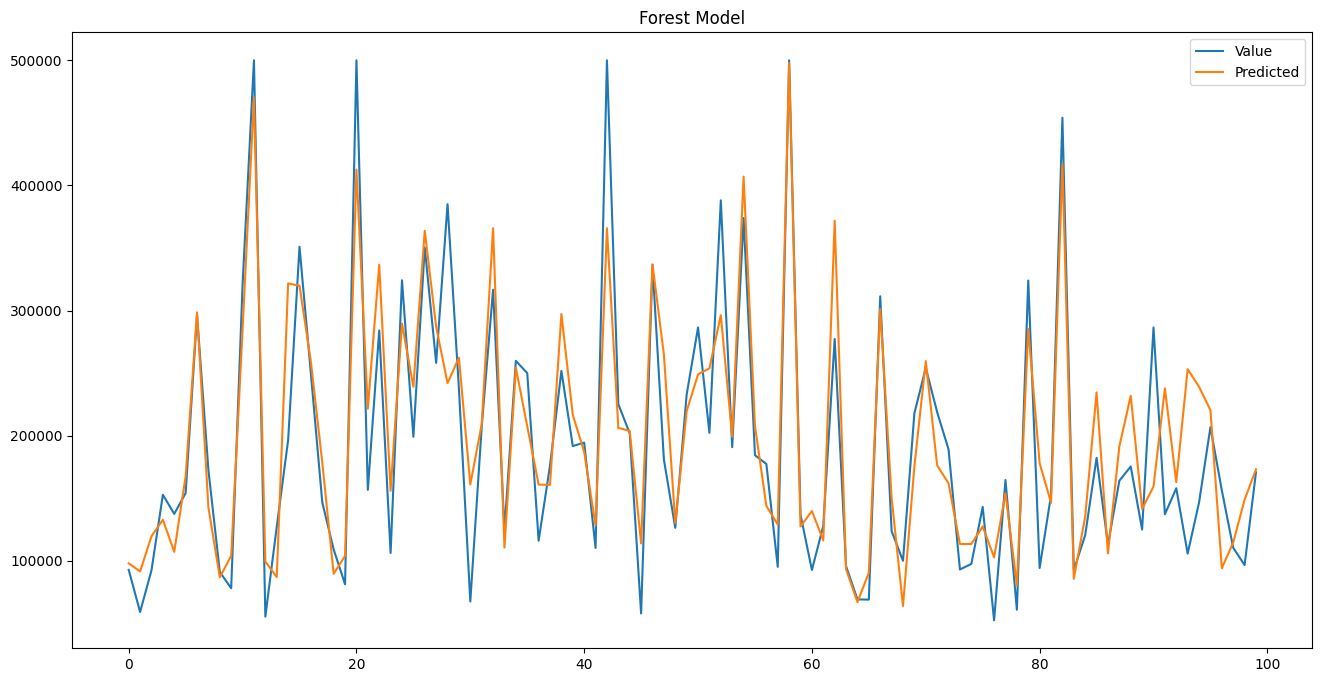

In [32]:
plt.figure(figsize=(16,8))
plt.plot(forest_plot[:100])
plt.title('Forest Model')
plt.legend(["Value","Predicted"])

### Model Comparison

In [33]:
from sklearn.metrics import r2_score


#### Linear Regression

In [34]:
def reg_score(y_test,x_train, y_train, pred_1):
    global reg_sc
    reg_sc = r2_score(y_test, pred_1)
    p = len(x_train[0])
    n = len(y_train)
    reg_adj_r2 = 1 - (1 - reg_sc)* (n-1) / (n-p-1)
    print('Linear Regression ')
    print('\nLinear Regresion R2 Score:', reg_sc)
    print('Adjusted R2 Score:', reg_adj_r2)
    return 
reg_score(y_test,x_train, y_train, pred_1)

Linear Regression 

Linear Regresion R2 Score: 0.5715211321381475
Adjusted R2 Score: 0.5713272753597716


In [35]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [36]:
def reg_me (y_test, pred_1):
    mse = mean_squared_error(y_test , pred_1)
    mae = mean_absolute_error(y_test , pred_1)
    mape = mean_absolute_percentage_error(y_test , pred_1)
    print('Linear Regression (Mean Error)')
    print('\nMean Squard Error:', mse,
          '\nMean Absolute Error:', mae, 
          '\nMean Absolute Percentage Error:', mape)
reg_me (y_test, pred_1)

Linear Regression (Mean Error)

Mean Squard Error: 5766006800.739376 
Mean Absolute Error: 55819.14707705766 
Mean Absolute Percentage Error: 0.34387493793584456


In [37]:
def reg_me_sqrt (y_test, pred_1):
    global reg_rsmt
    mse = mean_squared_error(y_test , pred_1)
    reg_rsmt = np.sqrt(mse)
    print('Linear Regression (Root Mean Squared Error): ',reg_rsmt)
    return 

reg_me_sqrt(y_test, pred_1)

Linear Regression (Root Mean Squared Error):  75934.2268067528


### Ridge Model

In [38]:
def ridge_score(y_test,x_train, y_train, pred_2):
    global ridge_sc
    ridge_sc = r2_score(y_test, pred_2)
    p = len(x_train[0])
    n = len(y_train)
    ridge_adj_r2 = 1 - (1 - ridge_sc)* (n-1) / (n-p-1)
    print('Ridge Model')
    print('\nRidge Model R2 Score:', ridge_sc)
    print('Adjusted R2 Score:', ridge_adj_r2)
    return 

ridge_score(y_test,x_train, y_train, pred_2)

Ridge Model

Ridge Model R2 Score: 0.5715186145862701
Adjusted R2 Score: 0.5713247566688776


In [39]:
def reg_me (y_test, pred_2):
    mse = mean_squared_error(y_test , pred_2)
    mae = mean_absolute_error(y_test , pred_2)
    mape = mean_absolute_percentage_error(y_test , pred_2)
    print('Ridge Model (Mean Error)')
    print('\nMean Squard Error:', mse,
          '\nMean Absolute Error:', mae, 
          '\nMean Absolute Percentage Error:', mape)
reg_me (y_test, pred_2)

Ridge Model (Mean Error)

Mean Squard Error: 5766040679.239193 
Mean Absolute Error: 55820.228638458655 
Mean Absolute Percentage Error: 0.34389424683273595


In [40]:
def ridge_me_sqrt (y_test, pred_2):
    global ridge_rsmt
    mse = mean_squared_error(y_test , pred_2)
    ridge_rsmt = np.sqrt(mse)
    print('Ridge Model (Root Mean Squared Error): ',ridge_rsmt)
    return 

ridge_me_sqrt(y_test, pred_2)

Ridge Model (Root Mean Squared Error):  75934.44988435219


#### Random Forest Regressor

In [41]:
def forest_score(y_test,x_train, y_train, pred_3):
    global forest_sc
    forest_sc = r2_score(y_test, pred_3)
    p = len(x_train[0])
    n = len(y_train)
    forest_adj_r2 = 1 - (1 - forest_sc)* (n-1) / (n-p-1)
    print('Random Forest Regressor')
    print('\nRidge Model R2 Score:', forest_sc)
    print('Adjusted R2 Score:', forest_adj_r2)
    return 

forest_score(y_test,x_train, y_train, pred_3)

Random Forest Regressor

Ridge Model R2 Score: 0.7078489224808779
Adjusted R2 Score: 0.7077167445114729


In [42]:
def forest_me (y_test, pred_3):
    mse = mean_squared_error(y_test , pred_3)
    mae = mean_absolute_error(y_test , pred_3)
    mape = mean_absolute_percentage_error(y_test , pred_3)
    print('Random Forest Regressor (Mean Error)')
    print('\nMean Squard Error:', mse,
          '\nMean Absolute Error:', mae, 
          '\nMean Absolute Percentage Error:', mape)
forest_me (y_test, pred_3)

Random Forest Regressor (Mean Error)

Mean Squard Error: 3931454328.7154946 
Mean Absolute Error: 43921.57297674419 
Mean Absolute Percentage Error: 0.25389712218486193


In [43]:
def forest_me_sqrt (y_test, pred_3):
    global forest_rsmt
    mse = mean_squared_error(y_test , pred_3)
    forest_rsmt = np.sqrt(mse)
    print('Random Forest Regressor (Root Mean Squared Error): ',forest_rsmt)
    return 

forest_me_sqrt(y_test, pred_3)

Random Forest Regressor (Root Mean Squared Error):  62701.31042263387


In [44]:
# RMSE Scientific Format

reg_rsmt = "{:.3e}".format(reg_rsmt)
ridge_rsmt = "{:.3e}".format(ridge_rsmt)
forest_rsmt = "{:.3e}".format(forest_rsmt)

In [45]:
models = ['Linear', 'Ridge', 'Forest']
data = [[reg_sc,reg_rsmt], [ridge_sc,ridge_rsmt], [forest_sc, forest_rsmt]]
cols = ['R2 Score', 'RMSE']
pd.DataFrame(data, columns=cols, index= models).sort_values(ascending= False, by =['R2 Score'])

,R2 Score,RMSE
Forest,0.707849,6.270e+04
Linear,0.571521,7.593e+04
Ridge,0.571519,7.593e+04


### Summary: Random Forest Regressor  is better at predicting the target variable based on the features